# Dataset



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

# X = 4 * np.random.rand(100,1)
# Y = 4 + 7* X +  + 6*X**2 + 7*np.random.randn(100,1)

# X = 4 * np.random.rand(100,1)  # X sampled in [0,4]
# Y = 4 + 7*X + 6*X**2 + 7*np.random.randn(100,1)

X = 10 * np.random.rand(100,1)
Y = 17 *np.sin(X) +  2*np.random.randn(100,1)

X = (X - X.min()) / (X.max() - X.min()) # NORMALISATION

X = np.clip(X, 1e-6, None) # NORMALISATION



# Dynamic Regression Functions (from Array)

In [2]:
def CustomRegression(RegressionFunction: list[list[int]], Xparam) -> int:
  PredictedValueConstant = 0
  for Term in RegressionFunction:
    PredictedValueConstant = PredictedValueConstant + (Term[0] * Xparam ** Term[1])

  return PredictedValueConstant


In [3]:
def ToString(RegressionFunction: list[list[int]]) -> str:
  StringOutput = f''
  for Term in RegressionFunction:
    StringOutput = StringOutput + f'{Term[0]} X ^ {Term[1]} + '
  return StringOutput




# Visualise Data Plot func



In [4]:
def PlotGraph(RegressionFunction: list[list[int]]):

  X_line = np.linspace(X.min(), X.max(), 100) # Creates 100 evenly spaced points

  # 4. Calculate the predicted Y-values (the regression line)

  Y_pred = 0

  for Term in RegressionFunction:
    Y_pred = Y_pred + (Term[0] *X_line**Term[1])


  # Y_pred = (C1 *X_line**E1) + (C2 *X_line**E2) + (C3 * X_line ** E3)


  # Add titles and labels

  plt.figure(figsize=(10, 6))
  plt.scatter(X, Y)
  plt.plot(X_line, Y_pred, color='red', linewidth=2, label=f'Regression Line: {ToString(RegressionFunction)}')

  plt.title('Years of Experience vs. Salary')
  plt.xlabel('YearsExperience')
  plt.ylabel('Salary')
  plt.grid(True)
  plt.show()

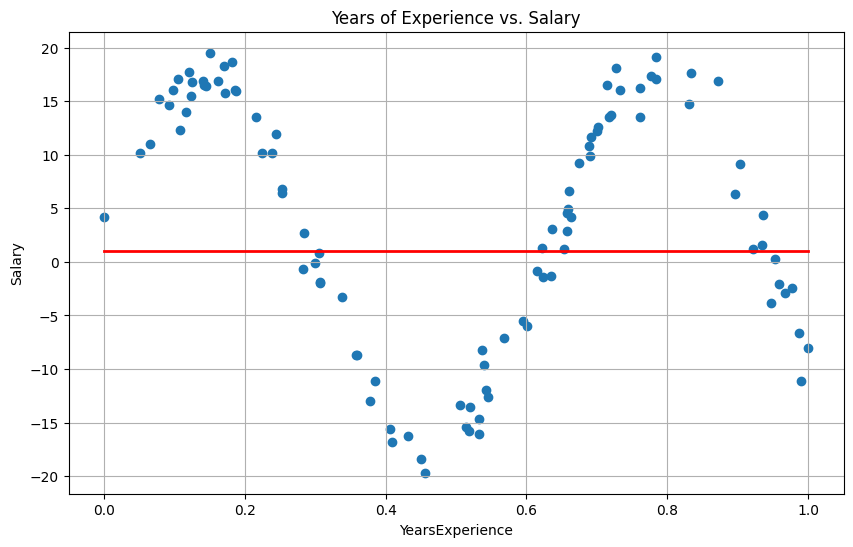

In [5]:
PlotGraph([[1,0],[0,1],[0,1]])

# Mean Squared Error Calculator

we're using the same data throughout, hence no need of DYNAMIC dynamic functions

In [6]:
# InputType: list[list[int]] = [[C1,E1],[C2,E2],[C3,E3]....]

def MSE(RegressionFunction: list[list[int]]):
  YStream = Y
  XStream = X
  Summation = 0
  for N in range(len(YStream)):

    ObservedValue = YStream[N]
    PredictedValue = CustomRegression(RegressionFunction, XStream[N].item())

    Error = ObservedValue - PredictedValue
    ErrorSquared = Error ** 2

    Summation += ErrorSquared
    # print(f'Observed Value = {ObservedValue} --- Predicted Value = {PredictedValue} --- Error = {Error}')

  return (Summation / len(YStream)).item()


In [7]:
MSE([[1,2],[5,6],[2,3]])

144.46095028591049

# Partial Derivatives
This is to look at the rate of change of the BiVariate MSE with respects to only 1 Parameter

In [8]:
def PartialDerivativeCN(CD, ED, RegressionFunction: list[list[int]]): # Its okay to pass in CD & ED Twice, it'll be easier later
  YStream = Y
  XStream = X
  Summation = 0
  for N in range(len(YStream)):

    ObservedValue = YStream[N]
    PredictedValue = CustomRegression(RegressionFunction,XStream[N].item())

    Error = PredictedValue - ObservedValue

    ErrorXPartialDer = Error * XStream[N].item() ** ED

    Summation = Summation + ErrorXPartialDer
    # print(f'Observed Value = {ObservedValue} --- Predicted Value = {PredictedValue} --- Error = {Error}')

  return (2 * Summation / len(YStream)).item()

In [9]:
import math
def PartialDerivativeEN(CD,ED, RegressionFunction: list[list[int]]):
  YStream = Y
  XStream = X
  Summation = 0
  for N in range(len(YStream)):

    ObservedValue = YStream[N]
    PredictedValue = CustomRegression(RegressionFunction,XStream[N].item())

    Error = PredictedValue - ObservedValue
    if not XStream[N].item() <= 0:

      ErrorXPartialDer = Error * (CD * (XStream[N].item()**ED) * (math.log(XStream[N].item())))
    else:
      continue


    Summation = Summation + ErrorXPartialDer
    # print(f'Observed Value = {ObservedValue} --- Predicted Value = {PredictedValue} --- Error = {Error}')

  return (2 * Summation / len(YStream)).item()

# Gradient Descent Iteration Steps

In [10]:
# PARAMETERS

AlphaC = 0.01
AlphaE = 2e-5 # Make steps of Exponent, almost nano

MaxIterations = 100000
MaxDegree = 20

min_exp = -5 # PREVENT EXPONENT EXPLOSION
max_exp = 20 # PREVENT EXPONENT EXPLOSION

WarmupPeriod = int(0.2 * MaxIterations)

lambda_L1 = 0.01 # L1 REGULARISATION PRUNING RATE (SMALL = LESS, LARGE = HEAVY)
PruneFrequency = 100 # Prune every 100
prune_threshold = 1e-5

ExponentDuplication_Tollerance = 1e-3 # Removing Duplicated Terms - How big should the difference be?
CoEfficientDuplication_Tollerance = 1e-2 # Removing Duplicated Terms - How big should the difference be for it to be gone?

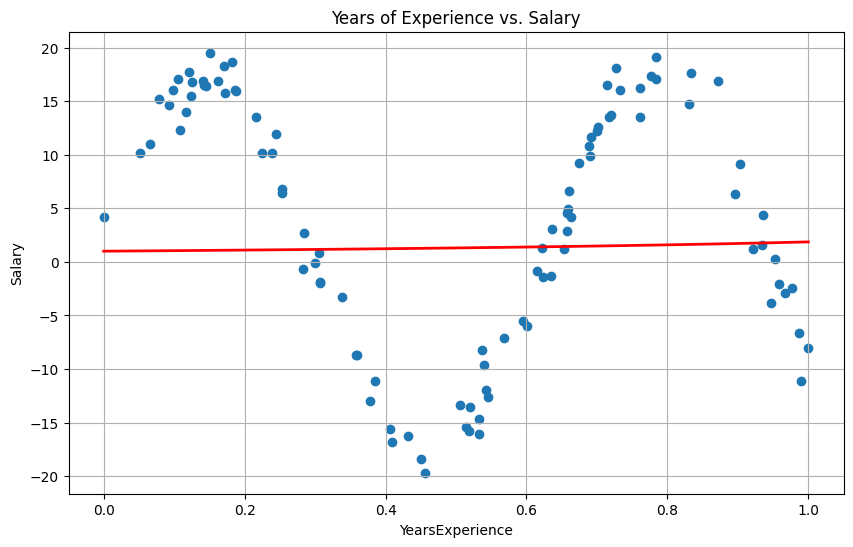

Final Parameters give an MSE Of 25.881002570942414, Parameters are 44.30431793451519 X ^ 0.12826013085483953 + -134.90568544821588 X ^ 0.9410070100387892 + 22.550468373138212 X ^ 2.9159198153364496 + 71.07874384035132 X ^ 3.3590595964160013 + 71.75440273638759 X ^ 3.3712154378591723 + 55.750081522891286 X ^ 3.4903751609851033 + 8.916746291180925 X ^ 5.258367072726943 + -15.544077633203772 X ^ 7.121380049576711 + -31.949267246152406 X ^ 8.21726449787209 + -38.85018594038009 X ^ 9.046768775749353 + -41.057698004502114 X ^ 9.840930803280413 + -38.363796813457114 X ^ 10.680452069516523 + -31.84457337865212 X ^ 11.60930432425852 + -22.41767146080709 X ^ 12.631536844979907 + -10.976367777160778 X ^ 13.727151334731188 + 3.3170146529360536 X ^ 15.957676648805275 + 13.709295141934255 X ^ 17.075862026863113 + 25.20325112656235 X ^ 18.1990493981142 + 36.74761910221696 X ^ 19.312468169834535 + 


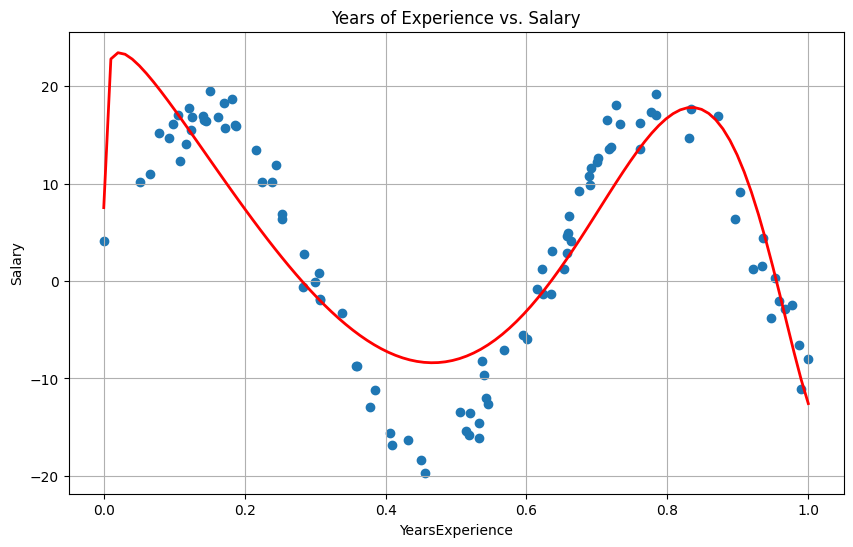

In [11]:
RegressionTerms = []


for D in range(MaxDegree):
  RegressionTerms.append([1 * (10 ** (-D / 3)),D])

PlotGraph(RegressionTerms)

MSE_History = [MSE(RegressionTerms)]

for I in range(MaxIterations):

  # PRE COMPUTING PARTIAL DERIVATIVES (Stability and avoding miditeration changes)

  PartialDerivatives = []

  for TermIndex in range(len(RegressionTerms)):
      tempParDerArr = []
      tempParDerArr.append(PartialDerivativeCN(RegressionTerms[TermIndex][0],RegressionTerms[TermIndex][1], RegressionTerms) + lambda_L1 * np.sign(RegressionTerms[TermIndex][0])) # L1 REGULARISATION
      tempParDerArr.append(PartialDerivativeEN(RegressionTerms[TermIndex][0],RegressionTerms[TermIndex][1], RegressionTerms))

      PartialDerivatives.append(tempParDerArr)


  for TermIndex in range(len(RegressionTerms)):
        RegressionTerms[TermIndex][0] = RegressionTerms[TermIndex][0] - (AlphaC * PartialDerivatives[TermIndex][0])
        RegressionTerms[TermIndex][1] = RegressionTerms[TermIndex][1] - (AlphaE * PartialDerivatives[TermIndex][1])


        RegressionTerms[TermIndex][1] = np.clip(RegressionTerms[TermIndex][1], min_exp, max_exp) # PREVENT EXPONENT EXPLOSION, USE CLIP, BASICALLY IF BIGGER THAN 8, IT BECOMES 8, IF ITS SMALLER THAN -5, IT BECOMES -5


  if I > WarmupPeriod and I % PruneFrequency == 0:
    RegressionTerms = [t for t in RegressionTerms if abs(t[0]) > prune_threshold] # PRUNE COEFFICIENTS THAT ARE CLOSE TO THRESHOLD

    # unique_terms = []
    # for TermIndex in range(len(RegressionTerms)):
    #     if not [RegressionTerms[TermIndex][0],RegressionTerms[TermIndex][1]] in unique_terms:
    #         unique_terms.append([RegressionTerms[TermIndex][0],RegressionTerms[TermIndex][1]]) # PRUNE REPEATED TERMS

    # RegressionTerms = unique_terms

    # Removing Duplicated Terms - How big should the difference be?
    unique_terms = []
    for TermIndex in range(len(RegressionTerms)):
        duplicate = False
        for CompareCoefficient, CompareExponent in unique_terms:
          # abs(RegressionTerms[TermIndex][1] - CompareExponent) < ExponentDuplication_Tollerance
          # abs(RegressionTerms[TermIndex][0] - CompareCoefficient) < CoEfficientDuplication_Tollerance
            if abs(RegressionTerms[TermIndex][1] - CompareExponent) < ExponentDuplication_Tollerance and abs(RegressionTerms[TermIndex][0] - CompareCoefficient) < CoEfficientDuplication_Tollerance:
                duplicate = True
                break
        if not duplicate:
            unique_terms.append([RegressionTerms[TermIndex][0], RegressionTerms[TermIndex][1]])
    RegressionTerms = unique_terms





  MSE_History.append(MSE(RegressionTerms))



print(f'Final Parameters give an MSE Of {MSE(RegressionTerms)}, Parameters are {ToString(RegressionTerms)}')

PlotGraph(RegressionTerms)

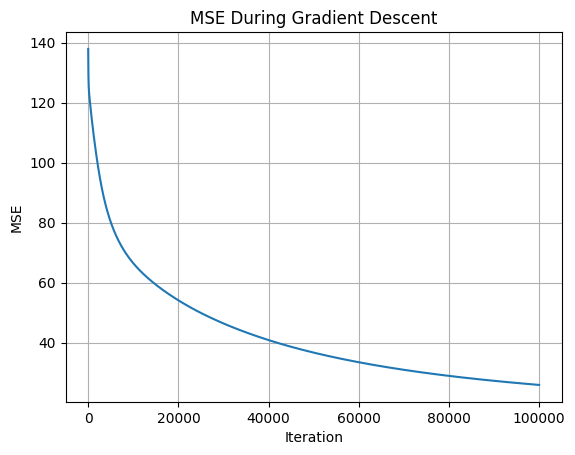

In [12]:

plt.plot(MSE_History)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("MSE During Gradient Descent")
plt.grid(True)
plt.show()